# Hands-On Pertemuan 9: Spark SQL

## Tujuan:
- Mengasah keterampilan analisis data menggunakan Spark SQL.
- Melakukan lebih banyak latihan SQL yang mengarah ke skenario dunia nyata.
- Mempersiapkan mahasiswa untuk menggunakan Spark SQL dalam proyek besar.


### 1. Refresher: Basic SQL Operations in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.


In [1]:
pip install findspark

In [2]:
import findspark
findspark.init()

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("tugas_9").getOrCreate()

In [4]:
data = [
    ('Prabowo', 75, 'M', 3000, 1),
    ('Mega', 69, 'F', 4100, 2),
    ('Iriana', 30, 'F', 3000, 2),
    ('Joko', 55, 'M', 2700, 3),
    ('Ganjar', 55, 'M', 3500, 3),
    ('Mahfud', 55, 'M', 5000, 3),
    ('Puan', 69, 'F', 9500, 3),
    ('Teddy', 75, 'M', 6500, 1),
    ('Sri', 30, 'M', 5500, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-------+---+------+------+------+
|   Name|Age|Gender|Salary|DeptId|
+-------+---+------+------+------+
|Prabowo| 75|     M|  3000|     1|
|   Mega| 69|     F|  4100|     2|
| Iriana| 30|     F|  3000|     2|
|   Joko| 55|     M|  2700|     3|
| Ganjar| 55|     M|  3500|     3|
| Mahfud| 55|     M|  5000|     3|
|   Puan| 69|     F|  9500|     3|
|  Teddy| 75|     M|  6500|     1|
|    Sri| 30|     M|  5500|     1|
+-------+---+------+------+------+

+------+---+
|  Name|Age|
+------+---+
|  Mega| 69|
|Ganjar| 55|
|Mahfud| 55|
|  Puan| 69|
| Teddy| 75|
|   Sri| 30|
+------+---+

+-----------------+
|      avg(Salary)|
+-----------------+
|4755.555555555556|
+-----------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.


In [5]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     F|       3000| 30|
|     M|       5500| 30|
|     M|      11200| 55|
|     F|      13600| 69|
|     M|       9500| 75|
+------+-----------+---+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


In [6]:
# Menghitung rata-rata gaji per departemen
avg_salary_per_dept = spark.sql('''
SELECT DeptId, AVG(Salary) as AvgSalary
FROM employees
GROUP BY DeptId
''')
avg_salary_per_dept.createOrReplaceTempView('avg_salary')

# Menemukan karyawan dengan gaji di atas rata-rata untuk gender masing-masing
print('Karyawan dengan gaji di atas rata-rata tiap gender')
above_avg_salary = spark.sql('''
SELECT e.*
FROM employees e
JOIN (
    SELECT Gender, AVG(Salary) as GenderAvgSalary
    FROM employees
    GROUP BY Gender
) g ON e.Gender = g.Gender
WHERE e.Salary > g.GenderAvgSalary
''')
above_avg_salary.show()

# Membuat ranking karyawan berdasarkan gaji dalam departemen
print('Ranking karyawan berdasarkan gaji')
ranked_employees = spark.sql('''
SELECT *,
       ROW_NUMBER() OVER (PARTITION BY DeptId ORDER BY Salary DESC) as Rank
FROM employees
''')
ranked_employees.show()

Karyawan dengan gaji di atas rata-rata tiap gender
+------+---+------+------+------+
|  Name|Age|Gender|Salary|DeptId|
+------+---+------+------+------+
|  Puan| 69|     F|  9500|     3|
|Mahfud| 55|     M|  5000|     3|
| Teddy| 75|     M|  6500|     1|
|   Sri| 30|     M|  5500|     1|
+------+---+------+------+------+

Ranking karyawan berdasarkan gaji
+-------+---+------+------+------+----+
|   Name|Age|Gender|Salary|DeptId|Rank|
+-------+---+------+------+------+----+
|  Teddy| 75|     M|  6500|     1|   1|
|    Sri| 30|     M|  5500|     1|   2|
|Prabowo| 75|     M|  3000|     1|   3|
|   Mega| 69|     F|  4100|     2|   1|
| Iriana| 30|     F|  3000|     2|   2|
|   Puan| 69|     F|  9500|     3|   1|
| Mahfud| 55|     M|  5000|     3|   2|
| Ganjar| 55|     M|  3500|     3|   3|
|   Joko| 55|     M|  2700|     3|   4|
+-------+---+------+------+------+----+



### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.



In [ ]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


+-------+---+------+----+
|   Name|Age|Salary|rank|
+-------+---+------+----+
|    Sri| 30|  5500|   1|
| Iriana| 30|  3000|   2|
| Mahfud| 55|  5000|   1|
| Ganjar| 55|  3500|   2|
|   Joko| 55|  2700|   3|
|   Puan| 69|  9500|   1|
|   Mega| 69|  4100|   2|
|  Teddy| 75|  6500|   1|
|Prabowo| 75|  3000|   2|
+-------+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.


In [7]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
        ('Prabowo', 75, 'M', 3000, 1),
    ('Mega', 69, 'F', 4100, 2),
    ('Iriana', 30, 'F', 3000, 2),
    ('Joko', 55, 'M', 2700, 3),
    ('Ganjar', 55, 'M', 3800, 3),
    ('Mahfud', 55, 'M', 5000, 3),
    ('Puan', 69, 'F', 9500, 3),
    ('Teddy', 75, 'M', 6500, 1),
    ('Sri', 30, 'M', 5500, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'Menteri'),
    (2, 'DPR'),
    (3, 'DPRD')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Projek 1'),
    (2, 'Projek 2'),
    (3, 'Projek 3')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-------+---+--------+-----------+
|   Name|Age|DeptName|ProjectName|
+-------+---+--------+-----------+
|    Sri| 30| Menteri|   Projek 1|
|  Teddy| 75| Menteri|   Projek 1|
|Prabowo| 75| Menteri|   Projek 1|
|   Puan| 69|    DPRD|   Projek 3|
| Mahfud| 55|    DPRD|   Projek 3|
| Ganjar| 55|    DPRD|   Projek 3|
|   Joko| 55|    DPRD|   Projek 3|
| Iriana| 30|     DPR|   Projek 2|
|   Mega| 69|     DPR|   Projek 2|
+-------+---+--------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


In [8]:
# Rata-rata gaji per departemen dan ranking karyawan berdasarkan gaji
avg_salary_and_ranking = spark.sql('''
SELECT e.Name, e.Age, e.Salary, d.DeptName,
       AVG(e.Salary) OVER (PARTITION BY e.DeptId) as AvgDeptSalary,
       ROW_NUMBER() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) as Rank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''')

avg_salary_and_ranking.show()

+-------+---+------+--------+-------------+----+
|   Name|Age|Salary|DeptName|AvgDeptSalary|Rank|
+-------+---+------+--------+-------------+----+
|  Teddy| 75|  6500| Menteri|       5000.0|   1|
|    Sri| 30|  5500| Menteri|       5000.0|   2|
|Prabowo| 75|  3000| Menteri|       5000.0|   3|
|   Mega| 69|  4100|     DPR|       3550.0|   1|
| Iriana| 30|  3000|     DPR|       3550.0|   2|
|   Puan| 69|  9500|    DPRD|       5250.0|   1|
| Mahfud| 55|  5000|    DPRD|       5250.0|   2|
| Ganjar| 55|  3800|    DPRD|       5250.0|   3|
|   Joko| 55|  2700|    DPRD|       5250.0|   4|
+-------+---+------+--------+-------------+----+



In [9]:
# Tren gaji berdasarkan usia di setiap departemen
salary_trend_by_age = spark.sql('''
SELECT e.Age, d.DeptName, AVG(e.Salary) as AvgSalary,
       ROW_NUMBER() OVER (PARTITION BY e.Age, e.DeptId ORDER BY AVG(e.Salary) DESC) as Rank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY e.Age, d.DeptName, e.DeptId
''')

salary_trend_by_age.show()

+---+--------+------------------+----+
|Age|DeptName|         AvgSalary|Rank|
+---+--------+------------------+----+
| 30| Menteri|            5500.0|   1|
| 30|     DPR|            3000.0|   1|
| 55|    DPRD|3833.3333333333335|   1|
| 69|     DPR|            4100.0|   1|
| 69|    DPRD|            9500.0|   1|
| 75| Menteri|            4750.0|   1|
+---+--------+------------------+----+



### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


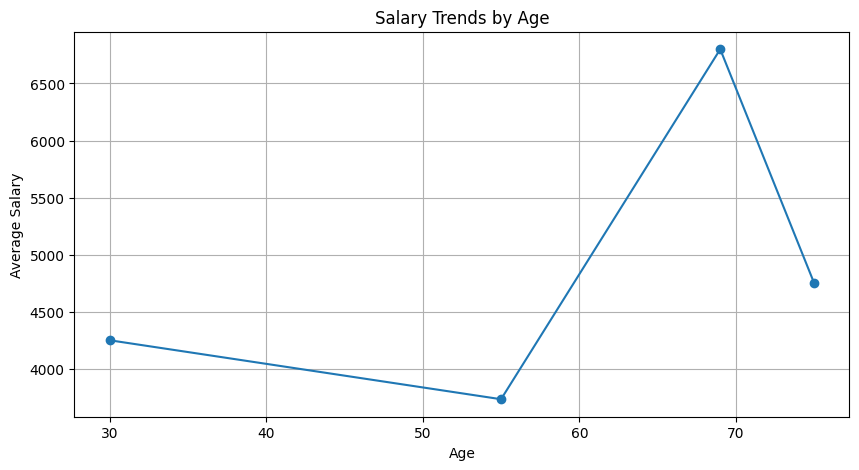

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.



In [ ]:
# Total gaji dan jumlah karyawan per departemen
total_salary_and_count = spark.sql('''
SELECT d.DeptName,
       SUM(e.Salary) as TotalSalary,
       COUNT(e.Name) as EmployeeCount
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''')

total_salary_and_count.show()

+--------+-----------+-------------+
|DeptName|TotalSalary|EmployeeCount|
+--------+-----------+-------------+
|     DPR|       7100|            2|
|    DPRD|      20700|            4|
| Menteri|      15000|            3|
+--------+-----------+-------------+



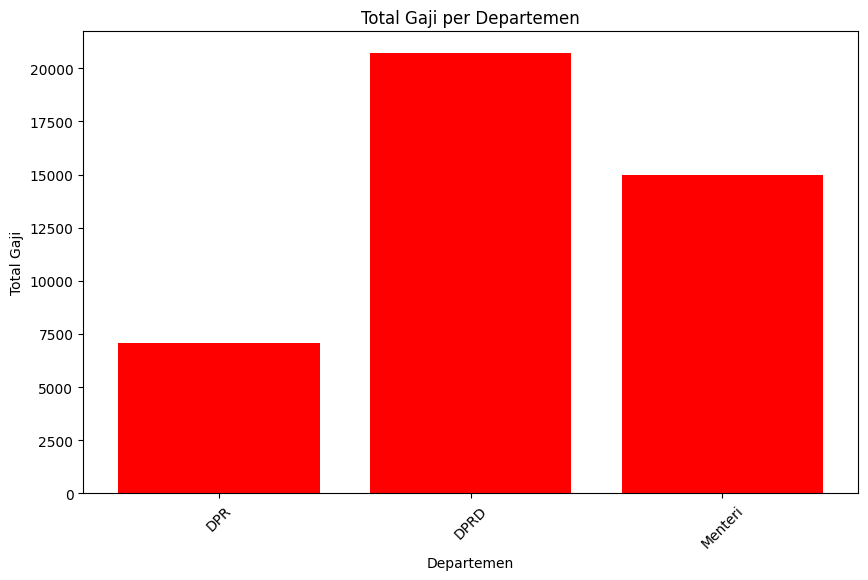

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Mengonversi hasil ke DataFrame pandas untuk visualisasi
df = total_salary_and_count.toPandas()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(df['DeptName'], df['TotalSalary'], color='red')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.title('Total Gaji per Departemen')
plt.xticks(rotation=45)
plt.show()

- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.


+------+---+------+
|  Name|Age|Salary|
+------+---+------+
|Mahfud| 55|  5000|
| Teddy| 75|  6500|
|  Puan| 69|  9500|
|   Sri| 30|  5500|
+------+---+------+



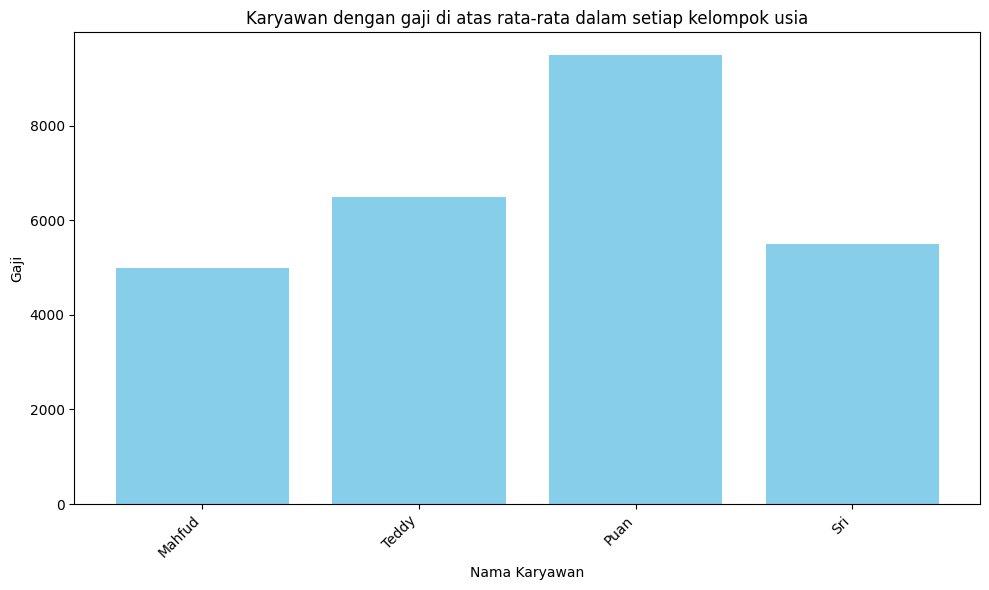

In [14]:
# Karyawan dengan gaji di atas rata-rata berdasarkan usia

import pandas as pd
import matplotlib.pyplot as plt

above_average_salary = spark.sql('''
WITH AvgSalaryByAge AS (
    SELECT Age, AVG(Salary) as AvgSalary
    FROM employees
    GROUP BY Age
)
SELECT e.Name, e.Age, e.Salary
FROM employees e
JOIN AvgSalaryByAge a ON e.Age = a.Age
WHERE e.Salary > a.AvgSalary
''')

above_average_salary.show()

above_average_salary_pd = above_average_salary.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(above_average_salary_pd['Name'], above_average_salary_pd['Salary'], color='skyblue')
plt.xlabel('Nama Karyawan')
plt.ylabel('Gaji')
plt.title('Karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.

In [19]:
import random
from pyspark.sql import SparkSession

# Inisialisasi Spark Session
spark = SparkSession.builder \
    .appName("Create Large Employee Dataset") \
    .getOrCreate()

# Membuat data karyawan
num_employees = 150  # Jumlah karyawan
names = [f'Karyawan {i}' for i in range(1, num_employees + 1)]
ages = [random.randint(20, 60) for _ in range(num_employees)]
genders = [random.choice(['M', 'F']) for _ in range(num_employees)]
salaries = [random.randint(2500, 10000) for _ in range(num_employees)]
dept_ids = [random.randint(1, 5) for _ in range(num_employees)]  # Misalkan ada 5 departemen

# Membuat DataFrame karyawan
employee_data = zip(names, ages, genders, salaries, dept_ids)
employees_df = spark.createDataFrame(employee_data, ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

# Menampilkan beberapa baris dari dataset
employees_df.show(10)

# Menyimpan DataFrame sebagai tabel sementara untuk digunakan dalam SQL
employees_df.createOrReplaceTempView('employees')

+-----------+---+------+------+------+
|       Name|Age|Gender|Salary|DeptId|
+-----------+---+------+------+------+
| Karyawan 1| 30|     F|  8928|     3|
| Karyawan 2| 42|     F|  7981|     1|
| Karyawan 3| 49|     F|  3085|     5|
| Karyawan 4| 25|     M|  6717|     5|
| Karyawan 5| 32|     M|  8112|     1|
| Karyawan 6| 25|     M|  9201|     4|
| Karyawan 7| 60|     F|  6460|     5|
| Karyawan 8| 50|     F|  3646|     5|
| Karyawan 9| 46|     F|  5876|     5|
|Karyawan 10| 59|     F|  3081|     5|
+-----------+---+------+------+------+
only showing top 10 rows



In [20]:
# Membuat tabel departemen
departments_data = [
    (1, 'HR'),
    (2, 'IT'),
    (3, 'Finance'),
    (4, 'Marketing'),
    (5, 'Sales')
]

departments_df = spark.createDataFrame(departments_data, ['DeptId', 'DeptName'])
departments_df.createOrReplaceTempView('departments')

# Analisis mendalam menggunakan SQL
analysis = spark.sql('''
SELECT d.DeptName,
       COUNT(e.Name) AS EmployeeCount,
       SUM(e.Salary) AS TotalSalary,
       AVG(e.Salary) AS AvgSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY d.DeptName
''')

analysis.show()

+---------+-------------+-----------+-----------------+
| DeptName|EmployeeCount|TotalSalary|        AvgSalary|
+---------+-------------+-----------+-----------------+
|  Finance|           29|     172088|5934.068965517241|
|       HR|           32|     194346|        6073.3125|
|       IT|           31|     182351|5882.290322580645|
|Marketing|           24|     153624|           6401.0|
|    Sales|           34|     191497|5632.264705882353|
+---------+-------------+-----------+-----------------+



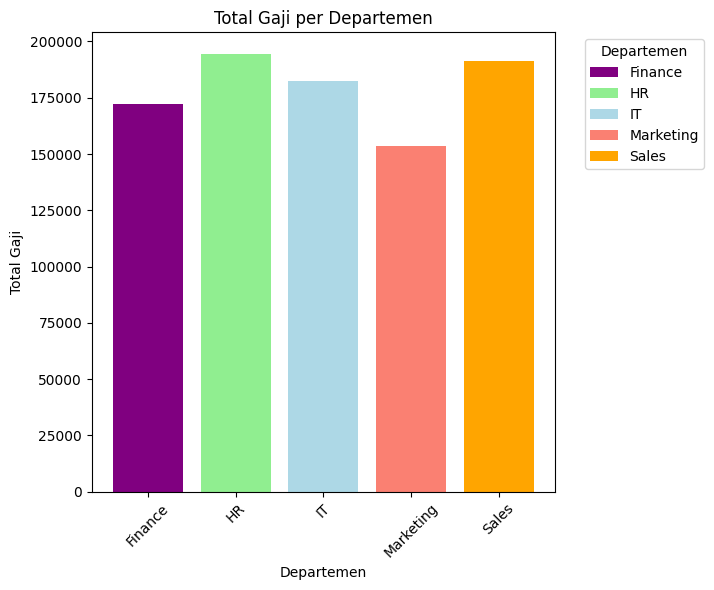

In [21]:
# Grafik Total Gaji per Departemen

import matplotlib.pyplot as plt
import pandas as pd

df_deep_analysis = analysis.toPandas()

plt.figure(figsize=(12, 6))

custom_colors = ['purple', 'lightgreen', 'lightblue', 'salmon', 'orange']

if len(custom_colors) < len(df_deep_analysis):
    raise ValueError("Not enough colors provided for the number of departments.")

plt.subplot(1, 2, 1)
bars = plt.bar(df_deep_analysis['DeptName'], df_deep_analysis['TotalSalary'], color=custom_colors[:len(df_deep_analysis)])
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.title('Total Gaji per Departemen')
plt.xticks(rotation=45)

plt.legend(bars, df_deep_analysis['DeptName'], title='Departemen', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


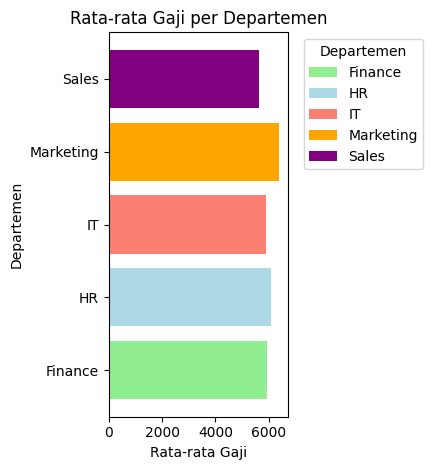

In [22]:
# Grafik Rata-Rata Gaji per Departemen

import matplotlib.pyplot as plt

custom_colors = ['lightgreen', 'lightblue', 'salmon', 'orange', 'purple']

if len(custom_colors) < len(df_deep_analysis):
    raise ValueError("Not enough colors provided for the number of departments.")

plt.subplot(1, 2, 2)
bars = plt.barh(df_deep_analysis['DeptName'], df_deep_analysis['AvgSalary'], color=custom_colors[:len(df_deep_analysis)])

plt.ylabel('Departemen')
plt.xlabel('Rata-rata Gaji')
plt.title('Rata-rata Gaji per Departemen')

plt.legend(bars, df_deep_analysis['DeptName'], title='Departemen', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
